In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("YlGnBu")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import classification_report

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['Survived'] = np.NaN

df_all = pd.concat([df_train, df_test])

df_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
# train set

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
# test set

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,NaN


In [5]:
# sample submission

df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Exploratory Data Analysis

In [6]:
# train data

train_columns = []

train_columns.extend(df_train.columns)

print(f'Loaded train dataset with shape {df_train.shape} ({df_train.shape[0]} rows and {df_train.shape[1]} columns) and column names: \n{train_columns}')

test_columns = []

test_columns.extend(df_test.columns)

print(f'\nLoaded test dataset with shape {df_test.shape} ({df_test.shape[0]} rows and {df_test.shape[1]} columns) and column names: \n{test_columns}')

gender_submission_columns = []

gender_submission_columns.extend(df_gender_submission.columns)

print(f'\nLoaded sample submission dataset with shape {df_gender_submission.shape} ({df_gender_submission.shape[0]} rows and {df_gender_submission.shape[1]} columns) and column names: \n{gender_submission_columns}')

Loaded train dataset with shape (891, 13) (891 rows and 13 columns) and column names: 
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test']

Loaded test dataset with shape (418, 13) (418 rows and 13 columns) and column names: 
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Survived']

Loaded sample submission dataset with shape (418, 2) (418 rows and 2 columns) and column names: 
['PassengerId', 'Survived']


## Train dataset

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


## Survival ratio

There were 342 survivors and 549 mortalities in the train set.
Making the chance of survival 38.38383838383838%


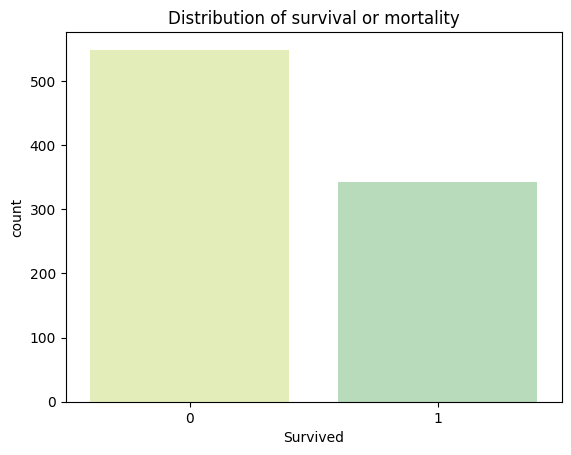

In [10]:
df_survived = df_train['Survived']

print(f'There were {df_survived.value_counts()[1]} survivors and {df_survived.value_counts()[0]} mortalities in the train set.')
print(f'Making the chance of survival {df_survived.value_counts()[1] / (df_survived.value_counts()[1] + df_survived.value_counts()[0]) * 100}%')

sns.countplot(x = df_survived)
plt.title('Distribution of survival or mortality')
plt.show()

## Name

In [11]:
# Extract titles

df_train['Title'] = df_train['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

#df_train['Title'] = df_train['Title'].str.split('.', expand=True)[0]

#df_train['Title'] = df_train['Title'].astype('string')

# List most frequent titles

titles = df_train['Title'].value_counts()[0:6]

print(titles)

for title in ['Mr']:
    print(f"Survival ratio for {title}: {df_train[df_train['Title'] == title]['Survived'].mean()}")

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Dr          7
 Rev         6
Name: Title, dtype: int64
Survival ratio for Mr: nan


In [12]:
(df_train['Title'].value_counts()
                .to_frame()
                .reset_index()
                .iloc[:6]
                .rename(columns={'index':'Title', 'Title':'Frequency'}))

,Title,Frequency
0,Mr,517
1,Miss,182
2,Mrs,125
3,Master,40
4,Dr,7
5,Rev,6


## Ticket Class

Passengers were split into three Ticket Classes and hereby the placement on the ship deck:
There were 216 people on the upper deck.
There were 184 people on the middle deck.
There were 491 people on the lower deck


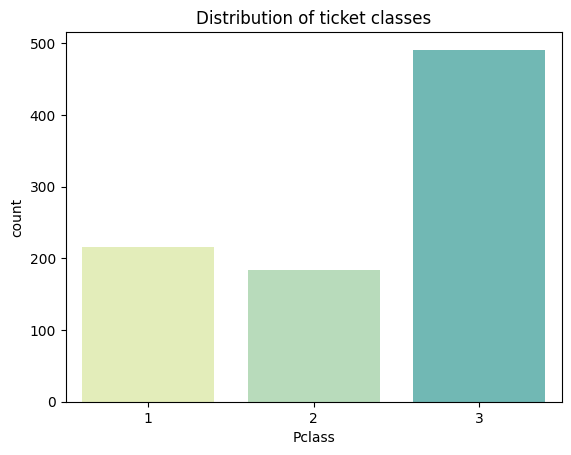

In [13]:
df_pclass = df_train['Pclass']

print('Passengers were split into three Ticket Classes and hereby the placement on the ship deck:')
print(f'There were {df_pclass.value_counts().sort_index()[1]} people on the upper deck.') 
print(f'There were {df_pclass.value_counts().sort_index()[2]} people on the middle deck.') 
print(f'There were {df_pclass.value_counts().sort_index()[3]} people on the lower deck')

sns.countplot(x = df_pclass)
plt.title('Distribution of ticket classes')
plt.show()

## Passenger sex

There were 577 males aboard.
There were 314 females aboard.


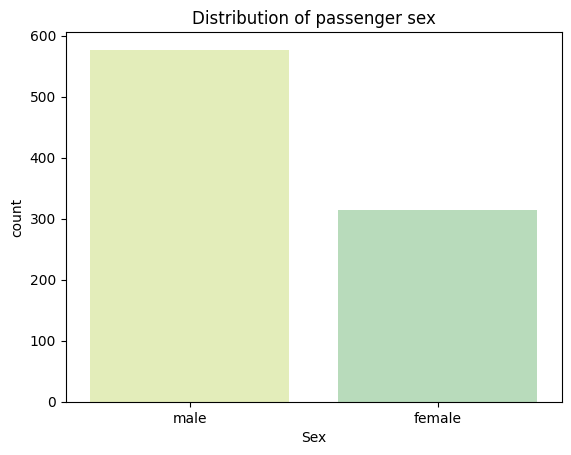

In [14]:
df_sex = df_train['Sex']
print(f'There were {df_sex.value_counts().sort_index()[1]} males aboard.') 
print(f'There were {df_sex.value_counts().sort_index()[0]} females aboard.') 

sns.countplot(x = df_sex)
plt.title('Distribution of passenger sex')
plt.show()

## Passenger age

There were 278 passenges under the age of 25.
There were 428 passengers between the age of 25 and 65.
There were 8 passenges older than 65.


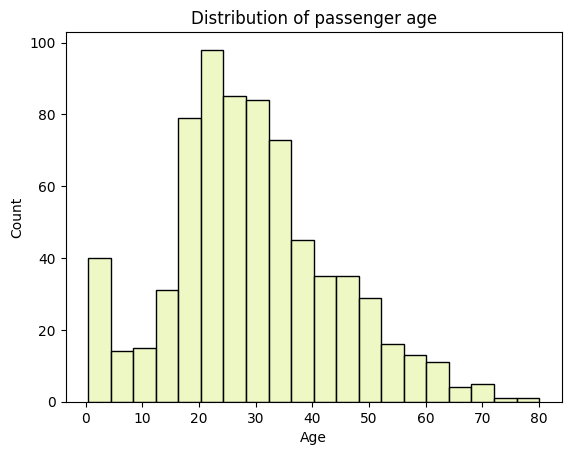

In [15]:
df_age = df_train['Age']
print(f'There were {np.count_nonzero(df_age < 25)} passenges under the age of 25.') 
print(f'There were {np.count_nonzero((df_age >= 25) & (df_age <= 65))} passengers between the age of 25 and 65.') 
print(f'There were {np.count_nonzero(df_age > 65)} passenges older than 65.') 


sns.histplot(data = df_age)
plt.title('Distribution of passenger age')
plt.show()

## Number of siblings/spouses

There were 608 passengers with no siblings or spouses.


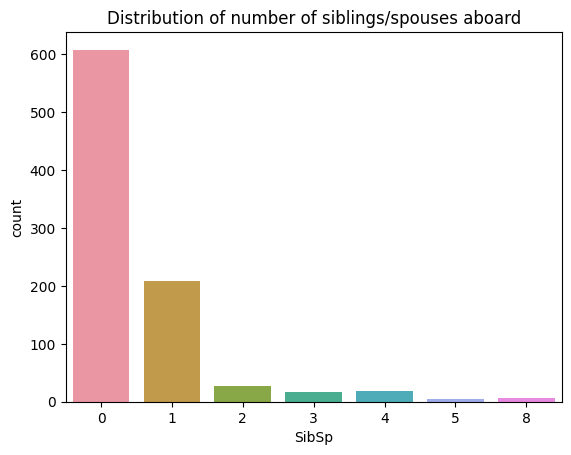

In [16]:
df_sibsp = df_train['SibSp']
print(f'There were {df_sibsp.value_counts().sort_index()[0]} passengers with no siblings or spouses.')

sns.countplot(x = df_sibsp)
plt.title('Distribution of number of siblings/spouses aboard')
plt.show()

## Number of parents/children

There were 678 passengers with no parents or children.


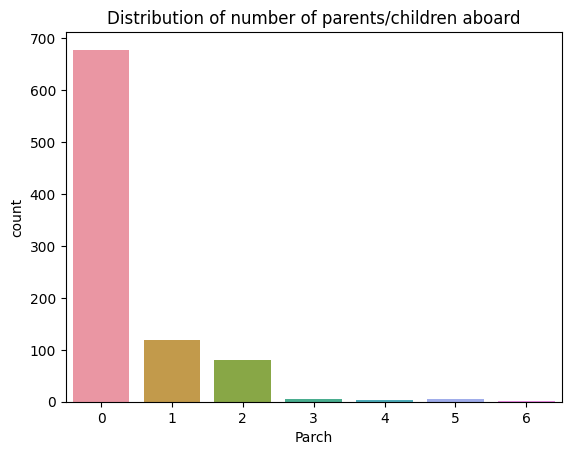

In [17]:
df_parch = df_train['Parch']
print(f'There were {df_parch.value_counts().sort_index()[0]} passengers with no parents or children.')

sns.countplot(x = df_parch)
plt.title('Distribution of number of parents/children aboard')
plt.show()

## Tickets

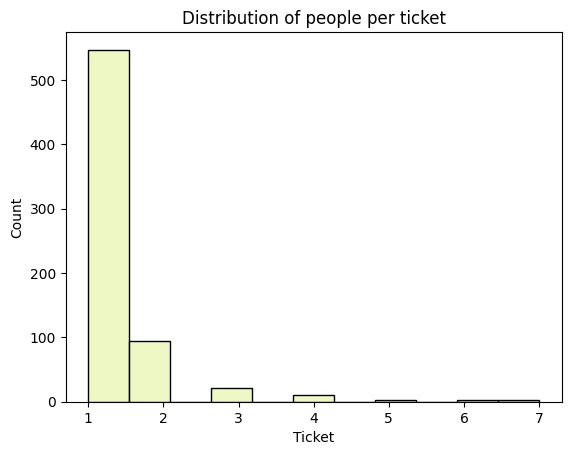

In [18]:
df_ticket = df_train['Ticket']
#print(f'There were {np.count_nonzero(df_fare < 10)} passengers payed less than 10 dollars for their ticket.') 
#print(f'There were {np.count_nonzero((df_fare >= 10) & (df_fare <= 50))} passengers payed between 10 and 50 dollars for their ticket.') 
#print(f'There were {np.count_nonzero(df_fare > 50)} passengers payed more than 50 dollars for their ticket.') 


sns.histplot(data = df_ticket.value_counts())
plt.title('Distribution of people per ticket')
plt.show()

## Fare

There were 336 passengers payed less than 10 dollars for their ticket.
There were 395 passengers payed between 10 and 50 dollars for their ticket.
There were 160 passengers payed more than 50 dollars for their ticket.


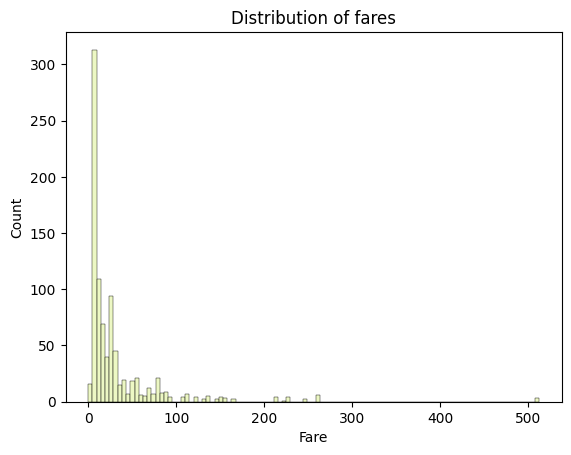

In [19]:
df_fare = df_train['Fare']
print(f'There were {np.count_nonzero(df_fare < 10)} passengers payed less than 10 dollars for their ticket.') 
print(f'There were {np.count_nonzero((df_fare >= 10) & (df_fare <= 50))} passengers payed between 10 and 50 dollars for their ticket.') 
print(f'There were {np.count_nonzero(df_fare > 50)} passengers payed more than 50 dollars for their ticket.') 


sns.histplot(data = df_fare)
plt.title('Distribution of fares')
plt.show()

## Cabin

There were 204 passengers who had a cabin.
There were 687 passengers who did not have a cabin.


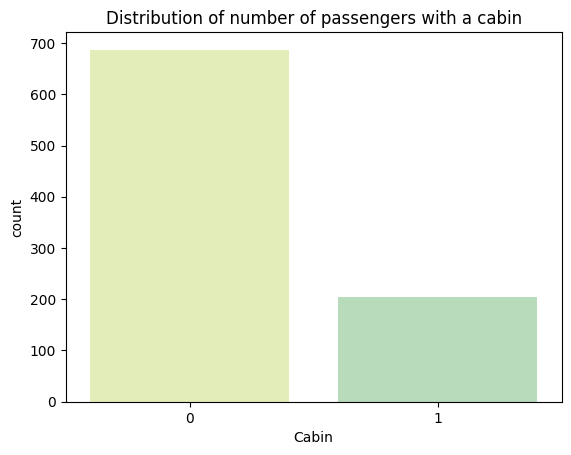

In [20]:
df_cabin = df_train['Cabin']
df_cabin = df_cabin.apply(lambda x: 1 if not pd.isnull(x) else 0)
print(f'There were {df_cabin.value_counts().sort_index()[1]} passengers who had a cabin.') 
print(f'There were {df_cabin.value_counts().sort_index()[0]} passengers who did not have a cabin.') 

sns.countplot(x = df_cabin)
plt.title('Distribution of number of passengers with a cabin')
plt.show()

## Port of Embarkation

There were 644 passengers boarding the ship at Southampton.
There were 168 passengers boarding the ship at Cherbourg.
There were 77 passengers boarding the ship at Queenstown.


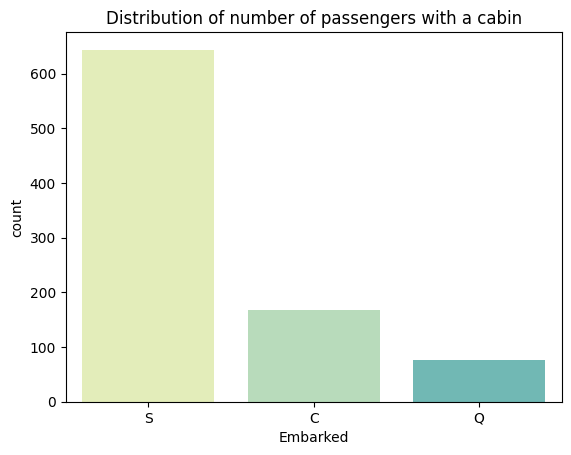

In [21]:
df_port = df_train['Embarked']
print(f'There were {df_port.value_counts().sort_index()[2]} passengers boarding the ship at Southampton.') 
print(f'There were {df_port.value_counts().sort_index()[0]} passengers boarding the ship at Cherbourg.') 
print(f'There were {df_port.value_counts().sort_index()[1]} passengers boarding the ship at Queenstown.') 

sns.countplot(x = df_port)
plt.title('Distribution of number of passengers with a cabin')
plt.show()

## Survival rate factors

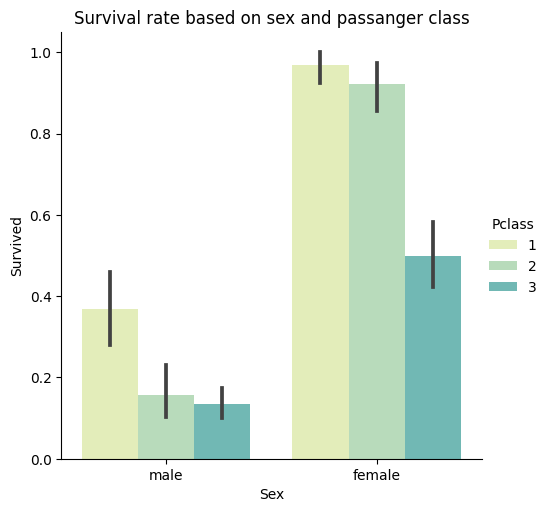

In [22]:
sns.catplot(data=df_train, x="Sex", y="Survived", hue="Pclass", kind="bar")
plt.title('Survival rate based on sex and passanger class')
plt.show()

# Feature selection

In [23]:
# change cabin names and numbers to cabin yes or no

df_train['Cabin'] = df_train['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# change male/female to 0 and 1

df_train.loc[df_train['Sex'] == 'male', 'Sex'] = 0
df_train.loc[df_train['Sex'] == 'female', 'Sex'] = 1

# One-Hot encode Embarkation (done with pd.get_dummies() further down)

df_train.loc[df_train['Embarked'] == 'S', 'embarked_Southampton'] = 1
df_train.loc[df_train['Embarked'] == 'C', 'embarked_Cherbough'] = 1
df_train.loc[df_train['Embarked'] == 'Q', 'embarked_Queenstown'] = 1

df_train = df_train.drop('Embarked', axis = 1)

df_train = df_train.replace(np.nan, 0)

In [24]:
# Corelation matrix of numerical categories
(df_train[[
    'PassengerId', 
    'Survived', 
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Cabin',
    'Pclass',
    'embarked_Southampton',
    'embarked_Cherbough',
    'embarked_Queenstown']].corr())

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass,embarked_Southampton,embarked_Cherbough,embarked_Queenstown
PassengerId,1.000000,-0.005007,0.038125,-0.057527,-0.001652,0.012658,0.019919,-0.035144,0.022148,-0.001205,-0.033606
Survived,-0.005007,1.000000,0.010539,-0.035322,0.081629,0.257307,0.316912,-0.338481,-0.155660,0.168240,0.003650
Age,0.038125,0.010539,1.000000,-0.184664,-0.048786,0.135516,0.269360,-0.361353,0.140578,0.001246,-0.237586
SibSp,-0.057527,-0.035322,-0.184664,1.000000,0.414838,0.159651,-0.040460,0.083081,0.070941,-0.059528,-0.026354
Parch,-0.001652,0.081629,-0.048786,0.414838,1.000000,0.216225,0.036987,0.018443,0.063036,-0.011069,-0.081228
Fare,0.012658,0.257307,0.135516,0.159651,0.216225,1.000000,0.482075,-0.549500,-0.166603,0.269335,-0.117216
Cabin,0.019919,0.316912,0.269360,-0.040460,0.036987,0.482075,1.000000,-0.725541,-0.110087,0.208528,-0.129572
Pclass,-0.035144,-0.338481,-0.361353,0.083081,0.018443,-0.549500,-0.725541,1.000000,0.081720,-0.243292,0.221009
embarked_Southampton,0.022148,-0.155660,0.140578,0.070941,0.063036,-0.166603,-0.110087,0.081720,1.000000,-0.778359,-0.496624
embarked_Cherbough,-0.001205,0.168240,0.001246,-0.059528,-0.011069,0.269335,0.208528,-0.243292,-0.778359,1.000000,-0.148258


Text(0.5, 1.0, 'Heatmap for correlation between columns of training data')

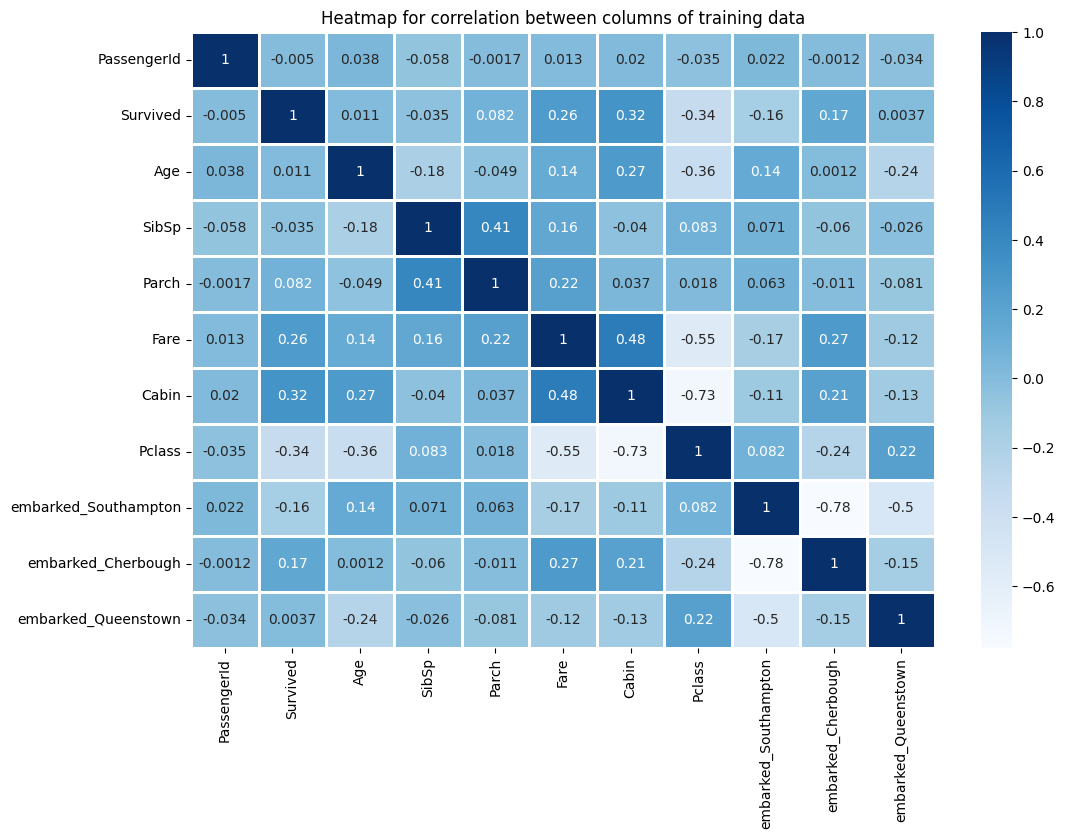

In [25]:
# Heatmap of correlation matrix for training data columns

fig, ax = plt.subplots(figsize=(12,8)) 

sns.heatmap((df_train[[
            'PassengerId', 
            'Survived', 
            'Age',
            'SibSp',
            'Parch',
            'Fare',
            'Cabin',
            'Pclass',
            'embarked_Southampton',
            'embarked_Cherbough',
            'embarked_Queenstown'
            ]].corr()),
            linewidths=1,
            cmap=plt.cm.Blues, 
            annot=True,
            ax=ax)

plt.title('Heatmap for correlation between columns of training data')

# Final Processing

In [26]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
#impute nulls for continuous data 
df_all.Age = df_all.Age.fillna(df_train.Age.median())
df_all.Fare = df_all.Fare.fillna(df_train.Fare.median())

# drop null the two null Embarked values
df_all.dropna(subset=['Embarked'],inplace = True)

# change cabin names and numbers to cabin yes or no

df_all['Cabin'] = df_all['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# change male/female to 0 and 1

df_all.loc[df_all['Sex'] == 'male', 'Sex'] = 0
df_all.loc[df_all['Sex'] == 'female', 'Sex'] = 1

# extract titles

df_all['Title'] = df_all['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

df_all = (df_all.drop([
                    'PassengerId',
                    'Name',
                    'Title',
                    'Ticket',
                    'Name'],
                    axis = 1
                    ))

df_all['Pclass'] = df_all['Pclass'].astype(str)

df_all_dummies = pd.get_dummies(df_all[['Pclass', 
                                        'Sex', 
                                        'Age',
                                        'SibSp', 
                                        'Parch', 
                                        'Fare', 
                                        'Cabin', 
                                        'Embarked', 
                                        'train_test']])

# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
(df_all_dummies[['Age', 
                 'SibSp', 
                 'Parch', 
                 'Fare']]) = (scale.fit_transform(df_all_dummies[['Age', 
                                                                  'SibSp', 
                                                                  'Parch', 
                                                                  'Fare']]))

X_train = df_all_dummies[df_all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = df_all_dummies[df_all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = df_all[df_all['train_test'] == 1]['Survived']
y_test = df_all[df_all['train_test'] == 0]['Survived']

print(f'{X_train.shape}, {X_test.shape}, {y_train.shape}')

(889, 13), (418, 13), (889,)


C:\Users\10122055\AppData\Local\Temp\ipykernel_10140\4201216275.py:32: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_all_dummies = pd.get_dummies(df_all[['Pclass',


# Model

## Naive Bayes

In [28]:
gnb = GaussianNB()

cv = cross_val_score(gnb, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.74719101 0.74719101 0.7752809  0.79775281 0.78531073]
0.7705452929600711


In [29]:
lr = LogisticRegression(max_iter=2000)

cv = cross_val_score(lr, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.82022472 0.79775281 0.78651685 0.78089888 0.84180791]
0.8054402336062972


In [30]:
dt = tree.DecisionTreeClassifier(random_state=42)

cv = cross_val_score(dt, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.75280899 0.7752809  0.81460674 0.73033708 0.81920904]
0.7784485494826383


In [31]:
knn = KNeighborsClassifier()

cv = cross_val_score(knn, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.80337079 0.78089888 0.80898876 0.8258427  0.8079096 ]
0.805402145623056


In [32]:
rf = RandomForestClassifier(random_state=42)

cv = cross_val_score(rf, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.79775281 0.78651685 0.84831461 0.76404494 0.81920904]
0.8031676506062337


In [33]:
svc = SVC(probability=True)

cv = cross_val_score(svc, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.80337079 0.81460674 0.86440678]
0.8245667491906303


In [34]:
xgb = XGBClassifier(random_state = 42)

cv = cross_val_score(xgb, 
                     X_train, 
                     y_train, 
                     cv=5)

print(cv)
print(cv.mean())

[0.79213483 0.81460674 0.84831461 0.79213483 0.86440678]
0.8223195581793945


In [35]:
voting_clf = VotingClassifier(estimators=[
                                          ('lr', lr), 
                                          ('knn', knn), 
                                          ('rf', rf), 
                                          ('gnb', gnb), 
                                          ('dt', dt), 
                                          ('svc', svc), 
                                          ('xgb', xgb)],
                                          voting='soft'
                                          )

cv = cross_val_score(voting_clf, X_train, y_train, cv=5)

print(cv)
print(cv.mean())

[0.80337079 0.79775281 0.84831461 0.78651685 0.85875706]
0.8189424236653335


## Baseline submission of best performing model

In [36]:
voting_clf.fit(X_train, y_train)

y_hat_baseline = voting_clf.predict(X_test).astype(int)

baseline_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_baseline}

baseline_submission = pd.DataFrame(data=baseline_submission)

baseline_submission.to_csv('baseline_submission.csv', index=False)

# Model Tuning - Hyperparameter GridSearch

In [37]:
def model_performance(model, name):
    print(name)
    print(f'Best Score: {model.best_score_}')
    print(f'Best Parameters: {model.best_params_}')    

In [38]:
lr = LogisticRegression()

parameter_grid = {'max_iter' : [2000],
                  'penalty' : ['l1', 'l2'],
                  'C' : np.logspace(-4, 4, 20),
                  'solver' : ['liblinear'
                  ]}

lr_model = GridSearchCV(lr, 
                        param_grid=parameter_grid, 
                        cv=5, 
                        verbose=True, 
                        n_jobs=1)

best_lr_model = lr_model.fit(X_train, y_train)

model_performance(best_lr_model, 'LogisticRegression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LogisticRegression
Best Score: 0.8065638291119152
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors' : [3,5,7,9],
                  'weights' : ['uniform', 'distance'],
                  'algorithm' : ['auto', 'ball_tree','kd_tree'],
                  'p' : [1,2]}

knn_model = GridSearchCV(knn, 
                         param_grid=parameter_grid, 
                         cv=5, 
                         verbose=True, 
                         n_jobs=-1)

best_knn_model = knn_model.fit(X_train, y_train)

model_performance(best_knn_model, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8065257411286739
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [40]:
svc = SVC(probability=True)

parameter_grid = {'kernel': ['rbf'], 
                   'gamma': [.1,.5,1,2,5,10],
                   'C': [.1, 1, 10, 100, 1000]}

svc_model = GridSearchCV(svc, 
                       param_grid=parameter_grid, 
                       cv=5, 
                       verbose=True, 
                       n_jobs=-1)

best_svc_model = svc_model.fit(X_train, y_train)

model_performance(best_svc_model,'SVC')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
SVC
Best Score: 0.8290547832158953
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [41]:
rf = RandomForestClassifier(random_state=42)

parameter_grid = {'n_estimators': [100,500,1000], 
                  'bootstrap': [True,False],
                  'max_depth': [3,5,10,20,50,75,100,None],
                  'max_features': ['auto','sqrt'],
                  'min_samples_leaf': [1,2,4,10],
                  'min_samples_split': [2,5,10]}
                                  
rf_model_randomcv = RandomizedSearchCV(rf, 
                                param_distributions=parameter_grid, 
                                n_iter=100, 
                                cv=5, 
                                verbose=True, 
                                n_jobs=-1)


best_rf_model_randomcv = rf_model_randomcv.fit(X_train, y_train)

model_performance(best_rf_model_randomcv, 'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8301720307243065
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [42]:
rf = RandomForestClassifier(random_state=42)

parameter_grid = {'n_estimators': [400,450,500,550],
              'criterion':['gini','entropy'],
              'bootstrap': [True],
              'max_depth': [15, 20, 25],
              'max_features': ['auto','sqrt', 10],
              'min_samples_leaf': [2,3],
              'min_samples_split': [2,3]}
                                  
rf_model = GridSearchCV(rf, 
                      param_grid = parameter_grid, 
                      cv=5, 
                      verbose=True, 
                      n_jobs=-1)

best_rf_model = rf_model.fit(X_train, y_train)

model_performance(best_rf_model, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8346854567383991
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}


In [43]:
xgb = XGBClassifier(random_state=42)

parametere_grid = {
              'n_estimators': [450,500,550],
              'colsample_bytree': [0.75,0.8,0.85],
              'max_depth': [None],
              'reg_alpha': [1],
              'reg_lambda': [2, 5, 10],
              'subsample': [0.55, 0.6, .65],
              'learning_rate':[0.5],
              'gamma':[.5,1,2],
              'min_child_weight':[0.01],
              'sampling_method': ['uniform']}

xgb_model = GridSearchCV(xgb, 
                         param_grid=parameter_grid, 
                         cv=5, 
                         verbose=True, 
                         n_jobs=-1)

best_xgb_model = xgb_model.fit(X_train, y_train)

model_performance(best_xgb_model, 'XGB')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[11:49:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

XGB
Best Score: 0.8099155716371484
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}


In [46]:
best_rf_model.fit(X_train, y_train)

y_hat_tuned = best_rf_model.predict(X_test).astype(int)

tuned_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_tuned}

tuned_submission = pd.DataFrame(data=tuned_submission)

tuned_submission.to_csv('tuned_submission.csv', index=False)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


# Model performance

|Model|Scaled Performance|Scaled and Tuned Performance|
|--|--|--|
|Naive Bayes| 77.0%| NA|
|Logistic Regression| 80.5%| 80.7%|
|Decision Tree Classifier| 77.8%| NA|
|KNN Classifier| 80.5%|80.7%|
|**Random Forest Classifier**| 80.3%| **83.4%**|
|Support Vector Classifier| **82.5%**| 83.2%|
|Xtreme Gradient Boosting| 82.2%| 81.0%|
|Voting Classifier| 81.8%| NA|

In [51]:
#print(classification_report(y_test, y_hat_baseline))

#print(classification_report(y_test, y_hat_tuned))

ValueError: Input y_true contains NaN.